#Name: Kiran Songire



In [538]:
import pandas as pd
import numpy as np
import seaborn as sns

In [539]:
import matplotlib.pyplot as plt
import datetime as dt
import math

In [540]:
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
Transactions_data = pd.read_excel(data, 'Transactions', header=1)
NewCustomerList_data = pd.read_excel(data, 'NewCustomerList', header=1)
CustomerDemographic_data = pd.read_excel(data, 'CustomerDemographic', header=1)
CustomerAddress_data = pd.read_excel(data, 'CustomerAddress', header=1)

<ipython-input-540-66946817764b>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList_data = pd.read_excel(data, 'NewCustomerList', header=1)
<ipython-input-540-66946817764b>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic_data = pd.read_excel(data, 'CustomerDemographic', header=1)


In [541]:
Transactions_data.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [542]:
Transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [543]:
Transactions_data.shape


(20000, 13)

In [544]:
Transactions_data.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [545]:
Transactions_data.duplicated().sum()

0

In [546]:
Transactions_data.nunique()


transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [547]:
Transactions_data['order_status'].value_counts()



Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [548]:
Transactions_data['brand'].value_counts()


Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [549]:
Transactions_data['product_line'].value_counts()


Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [550]:
Transactions_data['product_class'].value_counts()


medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [551]:
Transactions_data['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [552]:
Transactions_data['product_first_sold_date']


0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [553]:
#convert date column from integer to datetime
Transactions_data['product_first_sold_date'] = pd.to_datetime(Transactions_data['product_first_sold_date'], unit='s')
Transactions_data['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [554]:
Transactions_data['product_first_sold_date'].head(20)

0    1970-01-01 11:27:25
1    1970-01-01 11:35:01
2    1970-01-01 10:06:01
3    1970-01-01 10:02:25
4    1970-01-01 11:43:46
5    1970-01-01 10:50:31
6    1970-01-01 09:29:25
7    1970-01-01 11:05:15
8    1970-01-01 09:17:35
9    1970-01-01 10:36:56
10   1970-01-01 11:19:44
11   1970-01-01 11:42:52
12   1970-01-01 09:35:27
13   1970-01-01 09:36:26
14   1970-01-01 10:36:33
15   1970-01-01 10:31:13
16   1970-01-01 10:36:46
17   1970-01-01 09:24:48
18   1970-01-01 11:05:15
19   1970-01-01 10:22:17
Name: product_first_sold_date, dtype: datetime64[ns]

Exploring New Customer List Data Set


In [555]:
NewCustomerList_data.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [556]:
NewCustomerList_data.head(5)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [557]:
NewCustomerList_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [558]:
NewCustomerList_data.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [559]:
NewCustomerList_data.shape


(1000, 18)

In [560]:
NewCustomerList_data.isnull().sum()


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [561]:
NewCustomerList_data.duplicated().sum()


0

In [562]:
NewCustomerList_data.nunique()


first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

In [563]:
NewCustomerList_data.columns


Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [564]:
NewCustomerList_data['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [565]:
NewCustomerList_data['job_industry_category'].value_counts()


Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [566]:
NewCustomerList_data['wealth_segment'].value_counts()


Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [567]:
NewCustomerList_data['state'].value_counts()


NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [568]:
NewCustomerList_data['owns_car'].value_counts()


No     507
Yes    493
Name: owns_car, dtype: int64

In [569]:
NewCustomerList_data['deceased_indicator'].value_counts()


N    1000
Name: deceased_indicator, dtype: int64

In [570]:
# Check the entries for each column
for col in CustomerDemographic_data.columns:
    print('{} : {}'.format(col, CustomerDemographic_data[col].unique()))

customer_id : [   1    2    3 ... 3998 3999 4000]
first_name : ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']
last_name : ['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']
gender : ['F' 'Male' 'Female' 'U' 'Femal' 'M']
past_3_years_bike_related_purchases : [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]
DOB : ['1953-10-12T00:00:00.000000000' '1980-12-16T00:00:00.000000000'
 '1954-01-20T00:00:00.000000000' ... '1975-12-12T00:00:00.000000000'
 '2001-07-13T00:00:00.000000000' '1991-11-05T00:00:00.000000000']
job_title : ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power En

In [571]:
# Remove deceased customers
CustomerDemographic_data = CustomerDemographic_data[CustomerDemographic_data['deceased_indicator'] == 'N']

# Drop columns
CustomerDemographic_data.drop(['first_name', 'last_name', 'default', 'job_title', 'deceased_indicator'], axis=1, inplace=True)

# Drop empty row
CustomerDemographic_data.dropna(axis=0, inplace=True)

# Correct the value of same attribute
CustomerDemographic_data['gender'].replace({'M' : 'Male'}, inplace=True)
CustomerDemographic_data['gender'].replace({'F' : 'Female'}, inplace=True)
CustomerDemographic_data['gender'].replace({'Femal' : 'Female'}, inplace=True)



# Create age column
CustomerDemographic_data['DOB'] = pd.to_datetime(CustomerDemographic_data['DOB'])
CustomerDemographic_data['age'] = (dt.datetime.now() - CustomerDemographic_data['DOB']) / np.timedelta64(1, 'Y')

# Check the age range (oldest and youngest customers)
print(CustomerDemographic_data['age'].min(), CustomerDemographic_data['age'].max())

21.544196756681192 179.76510478354004


<ipython-input-571-69d4fd58b041>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerDemographic_data.drop(['first_name', 'last_name', 'default', 'job_title', 'deceased_indicator'], axis=1, inplace=True)
<ipython-input-571-69d4fd58b041>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerDemographic_data.dropna(axis=0, inplace=True)
<ipython-input-571-69d4fd58b041>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CustomerDem

In [572]:
CustomerDemographic_data['gender'].value_counts()

Female    1689
Male      1565
U            1
Name: gender, dtype: int64

In [573]:
CustomerDemographic_data = CustomerDemographic_data[CustomerDemographic_data['age'] <= 100]


In [574]:
CustomerDemographic_data = CustomerDemographic_data[CustomerDemographic_data['age'] <= 100]


In [575]:
CustomerDemographic_data['DOB'] = pd.to_datetime(CustomerDemographic_data['DOB'])
CustomerDemographic_data['age'] = (dt.datetime.now() - CustomerDemographic_data['DOB']) / np.timedelta64(1, 'Y')

# Check the age range (oldest and youngest customers)
print(CustomerDemographic_data['age'].min(), CustomerDemographic_data['age'].max())

21.544196758558368 91.92757218721194


In [576]:
# Create age group column
ag = pd.Series(['20-34','35-49', '50-64', '65-79', '80-94'], dtype='category')
CustomerDemographic_data['age_group'] = ag

CustomerDemographic_data.loc[CustomerDemographic_data['age']<=34, 'age_group'] = ag[0]
CustomerDemographic_data.loc[(CustomerDemographic_data['age']>34) & (CustomerDemographic_data['age']<=49), 'age_group'] = ag[1]
CustomerDemographic_data.loc[(CustomerDemographic_data['age']>49) & (CustomerDemographic_data['age']<=64), 'age_group'] = ag[2]
CustomerDemographic_data.loc[(CustomerDemographic_data['age']>64) & (CustomerDemographic_data['age']<=79), 'age_group'] = ag[3]
CustomerDemographic_data.loc[CustomerDemographic_data['age']>79, 'age_group'] = ag[4]

print(CustomerDemographic_data.info())
CustomerDemographic_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3254 non-null   int64         
 1   gender                               3254 non-null   object        
 2   past_3_years_bike_related_purchases  3254 non-null   int64         
 3   DOB                                  3254 non-null   datetime64[ns]
 4   job_industry_category                3254 non-null   object        
 5   wealth_segment                       3254 non-null   object        
 6   owns_car                             3254 non-null   object        
 7   tenure                               3254 non-null   float64       
 8   age                                  3254 non-null   float64       
 9   age_group                            3254 non-null   category      
dtypes: category(

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,69.955868,65-79
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.776666,35-49
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0,69.682078,65-79
3,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0,61.980345,50-64
5,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,57.027472,50-64


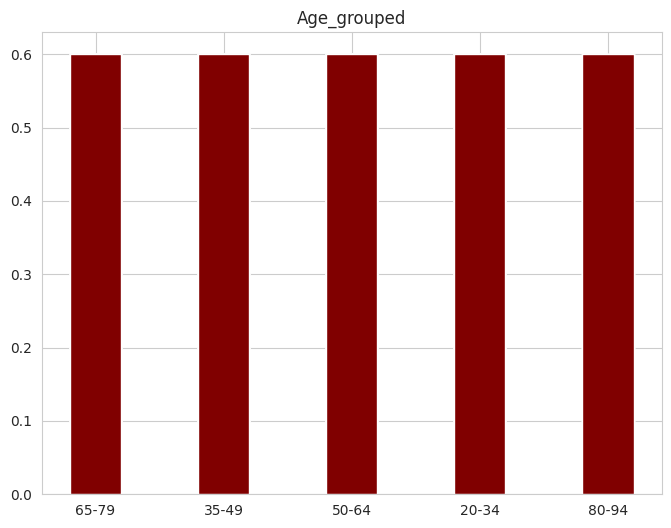

In [577]:

plt.bar(CustomerDemographic_data['age_group'], color ='maroon', height = 0.6,
        width = 0.4)

plt.title("Age_grouped")
plt.show()

In [580]:
Transactions_data['profit'] = Transactions_data['list_price']-Transactions_data['standard_cost']


# Create recency column
Transactions_data['recency'] = (Transactions_data['transaction_date'].max()-Transactions_data['transaction_date'])/np.timedelta64(1,'D')

print(Transactions_data.info())
Transactions_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87,308.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55,223.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61,75.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36,121.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82,90.0


In [581]:
# Create RFM score dataframe from Transactions dataframe
rfm_df = Transactions_data.groupby('customer_id').aggregate({'recency':'min', 'customer_id':'count', 'profit':'sum'})
rfm_df.rename(columns={'customer_id':'frequency'}, inplace=True)

rfm_df.head()

,recency,frequency,profit
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,8,3362.81
4,195.0,2,220.57
5,16.0,6,2394.94


In [582]:
rfm_df['r'] = pd.qcut(rfm_df['recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['f'] = pd.qcut(rfm_df['frequency'], q=4, labels=[1, 2, 3, 4])
rfm_df['m'] = pd.qcut(rfm_df['profit'], q=4, labels=[1, 2, 3, 4])

rfm_df.head()

,recency,frequency,profit,r,f,m
customer_id,,,,,,
1,7.0,11,3018.09,4,4,3
2,128.0,3,2226.26,1,1,2
3,102.0,8,3362.81,1,4,3
4,195.0,2,220.57,1,1,1
5,16.0,6,2394.94,4,2,2


In [583]:
# Create weighted RFM Score column
rfm_df['rfm_score'] = 100*rfm_df['r'].astype(int) + 10*rfm_df['f'].astype(int) + rfm_df['m'].astype(int)

# Create customer profile column
# Customer profile rankings start at Bronze, Silver, Gold and Platinum
rfm_df['customer_profile'] = pd.qcut(rfm_df['rfm_score'], q=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

print(rfm_df.info())
rfm_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 1 to 5034
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   recency           3494 non-null   float64 
 1   frequency         3494 non-null   int64   
 2   profit            3494 non-null   float64 
 3   r                 3494 non-null   category
 4   f                 3494 non-null   category
 5   m                 3494 non-null   category
 6   rfm_score         3494 non-null   int64   
 7   customer_profile  3494 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 150.9 KB
None


,recency,frequency,profit,r,f,m,rfm_score,customer_profile
customer_id,,,,,,,,
1,7.0,11,3018.09,4,4,3,443,Platinum
2,128.0,3,2226.26,1,1,2,112,Bronze
3,102.0,8,3362.81,1,4,3,143,Bronze
4,195.0,2,220.57,1,1,1,111,Bronze
5,16.0,6,2394.94,4,2,2,422,Platinum


In [584]:
# Correct the value of same attribute
CustomerAddress_data['state'].replace({'New South Wales' : 'NSW'}, inplace=True)
CustomerAddress_data['state'].replace({'Victoria':'VIC' }, inplace=True)
CustomerAddress_data['state'].replace({'Queensland':'QLD'}, inplace=True)

In [585]:
# Check the entries for each column
for col in CustomerAddress_data.columns:
    print('{} : {}'.format(col, CustomerAddress_data[col].unique()))

customer_id : [   1    2    4 ... 4001 4002 4003]
address : ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']
postcode : [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263 2154 2119 3016 4113 2032 4352 3020 2116 3057 2099 3749
 2148 3145 2021 2333 2783 2280 4120 3638 2074 2880 2430 4560 2088 2220
 3031 2250 2261

In [586]:
CustomerDemographic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3254 non-null   int64         
 1   gender                               3254 non-null   object        
 2   past_3_years_bike_related_purchases  3254 non-null   int64         
 3   DOB                                  3254 non-null   datetime64[ns]
 4   job_industry_category                3254 non-null   object        
 5   wealth_segment                       3254 non-null   object        
 6   owns_car                             3254 non-null   object        
 7   tenure                               3254 non-null   float64       
 8   age                                  3254 non-null   float64       
 9   age_group                            3254 non-null   category      
dtypes: category(

In [587]:
CustomerAddress_data.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [588]:
# Check duplications
print('Duplicated rows:')
CustomerAddress_data[CustomerAddress_data.duplicated()]

Duplicated rows:


,customer_id,address,postcode,state,country,property_valuation


In [589]:
# Join Customer Demographic, Customer Address and RFM score dataframes on customer id
dataset = rfm_df.merge(CustomerAddress_data.merge(CustomerDemographic_data, how='inner', on='customer_id'), how='inner', on='customer_id')

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2851 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2851 non-null   int64         
 1   recency                              2851 non-null   float64       
 2   frequency                            2851 non-null   int64         
 3   profit                               2851 non-null   float64       
 4   r                                    2851 non-null   category      
 5   f                                    2851 non-null   category      
 6   m                                    2851 non-null   category      
 7   rfm_score                            2851 non-null   int64         
 8   customer_profile                     2851 non-null   category      
 9   address                              2851 non-null   object        
 10  postcode    

,customer_id,recency,frequency,profit,r,f,m,rfm_score,customer_profile,address,...,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,7.0,11,3018.09,4,4,3,443,Platinum,060 Morning Avenue,...,10,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,69.955868,65-79
1,2,128.0,3,2226.26,1,1,2,112,Bronze,6 Meadow Vale Court,...,10,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.776666,35-49
2,4,195.0,2,220.57,1,1,1,111,Bronze,0 Holy Cross Court,...,9,Male,33,1961-10-03,IT,Mass Customer,No,7.0,61.980345,50-64
3,6,64.0,5,3946.55,2,2,3,223,Silver,9 Oakridge Court,...,9,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,57.027472,50-64
4,7,253.0,3,220.11,1,1,1,111,Bronze,4 Delaware Trail,...,9,Female,6,1976-02-23,Financial Services,Affluent Customer,Yes,11.0,47.589906,35-49


### ***Data Insights***

In [590]:
df = pd.read_csv('dataset.csv')

# Set grid for all figures
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (8,6)

Text(0.5, 0, 'Gender')

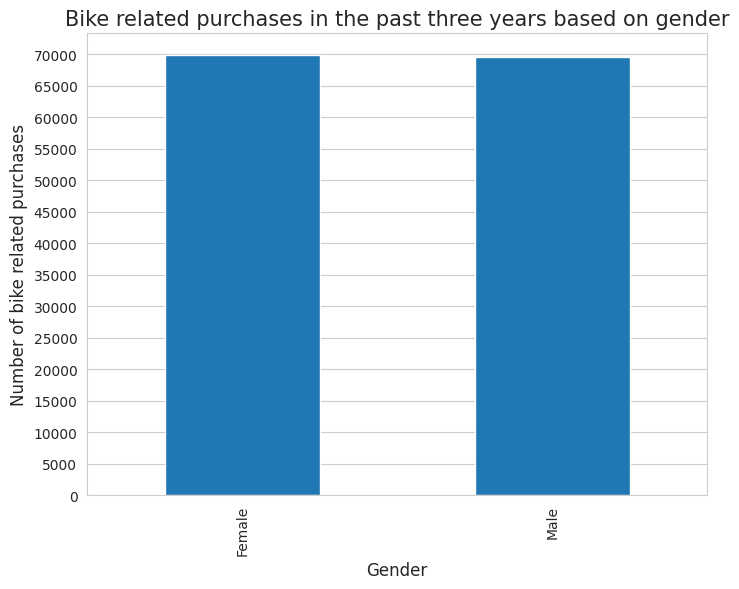

In [591]:
df1 = df.groupby('gender')['past_3_years_bike_related_purchases'].sum()
df1.plot(kind='bar')
plt.grid(axis='x')
plt.title('Bike related purchases in the past three years based on gender', fontsize=15)
plt.ylabel('Number of bike related purchases', fontsize=12)
plt.yticks(np.arange(0, 75000, 5000))
plt.xlabel('Gender', fontsize=12)

([<matplotlib.axis.XTick at 0x7b66b4d254b0>,
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1.0')])

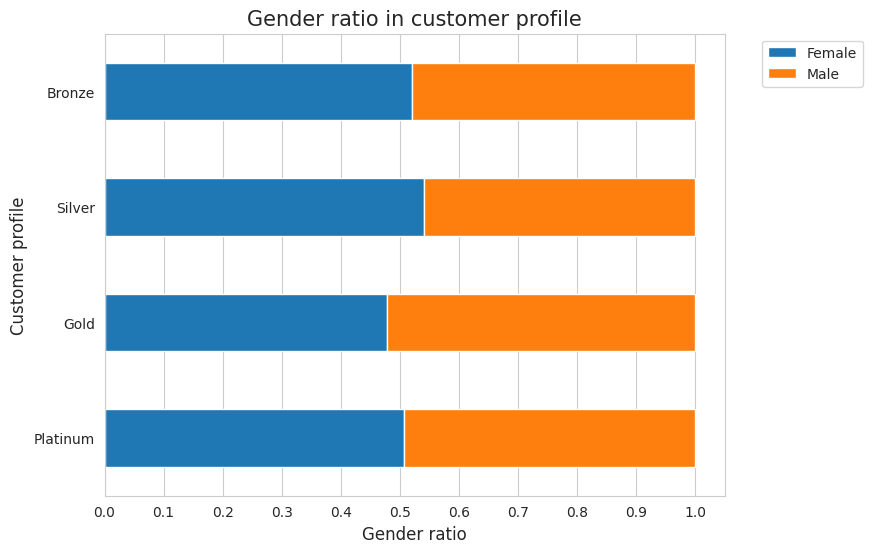

In [612]:
df2 = df.groupby(['customer_profile', 'gender']).size().unstack()
sort_cp = ['Platinum', 'Gold', 'Silver', 'Bronze']
df2 = df2.loc[sort_cp]

df2.apply(lambda x : x/x.sum(), axis=1).plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.title('Gender ratio in customer profile', fontsize=15)
plt.ylabel('Customer profile', fontsize=12)
plt.xlabel('Gender ratio', fontsize=12)
plt.xticks(np.arange(0, 1+0.1, 0.1))

**Total profit by age group and wealth segment**


Text(0.5, 0, 'Age group')

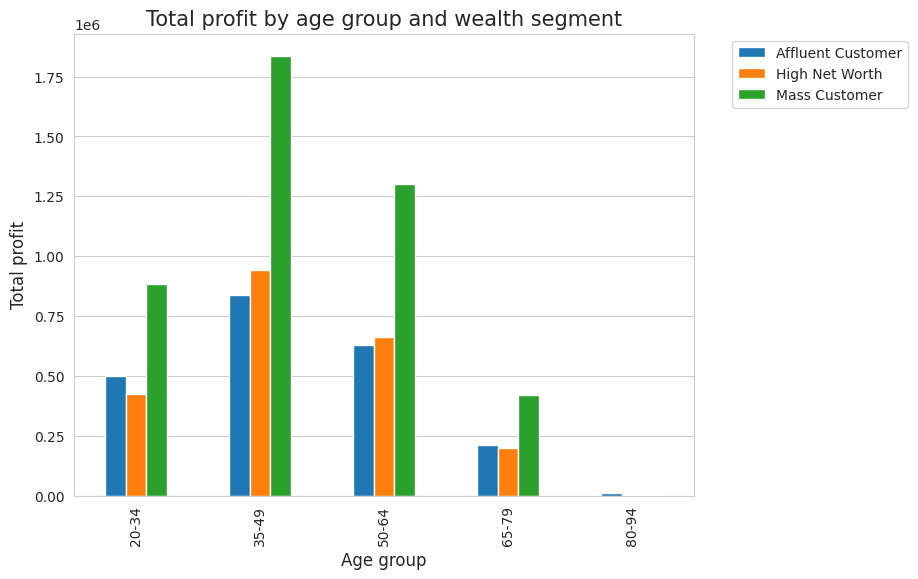

In [613]:
df3 = df.groupby(['age_group', 'wealth_segment'])['profit'].sum().unstack().fillna(0)

df3.plot(kind='bar')
plt.grid(axis = 'x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Total profit by age group and wealth segment', fontsize=15)
plt.ylabel('Total profit', fontsize=12)
plt.xlabel('Age group', fontsize=12)

**Total profit by job industry category**



Text(0.5, 0, 'Job industry category')

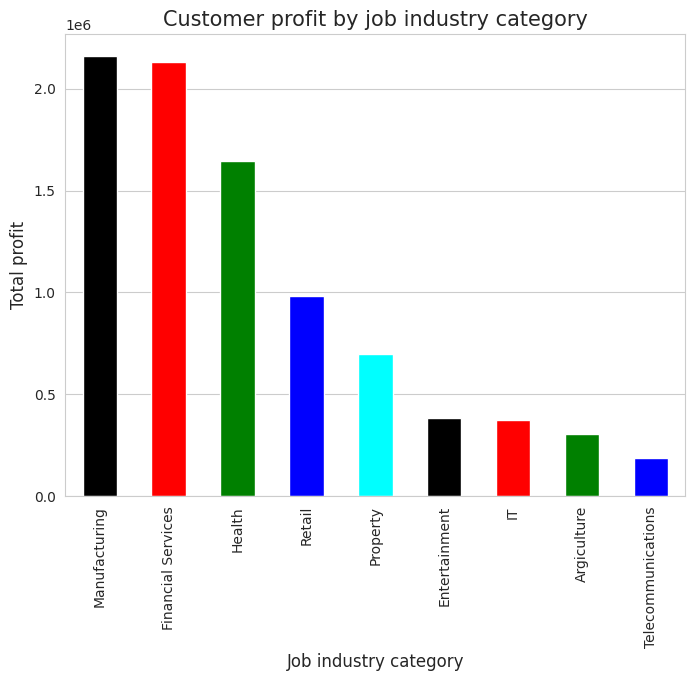

In [615]:
df4 = df.groupby('job_industry_category')['profit'].sum()
df4 = df4.sort_values(ascending=False)

df4.plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan'])
plt.grid(axis='x')
plt.title('Customer profit by job industry category', fontsize=15)
plt.ylabel('Total profit', fontsize=12)
plt.xlabel('Job industry category', fontsize=12)

Number of customers with and without cars in each state¶


Text(0.5, 0, 'State')

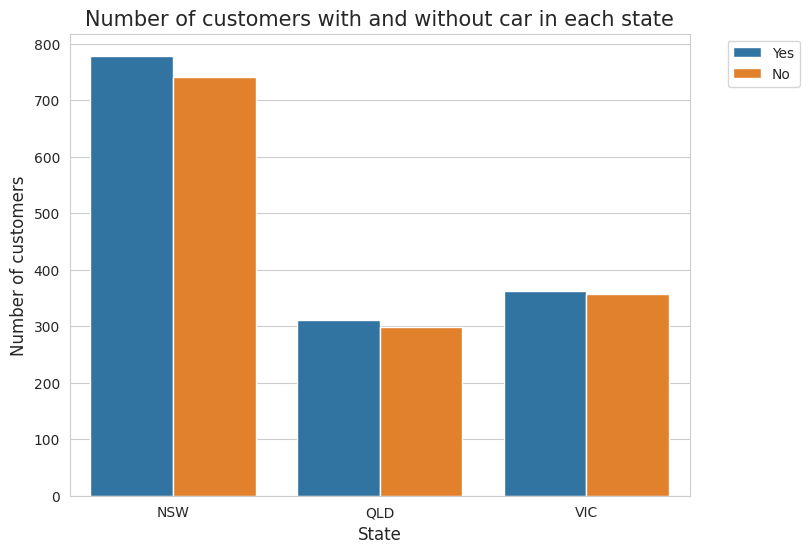

In [616]:
sns.countplot(x='state', hue='owns_car', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of customers with and without car in each state', fontsize=15)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('State', fontsize=12)

In [592]:
dataset.to_csv('dataset.csv', index=False)


In [593]:
NewCustomerList_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [601]:
CustomerDemographic_data['job_industry_category'].value_counts()


Manufacturing         796
Financial Services    767
Health                595
Retail                357
Property              267
IT                    151
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [602]:
CustomerDemographic_data['wealth_segment'].value_counts()


Mass Customer        1635
High Net Worth        826
Affluent Customer     793
Name: wealth_segment, dtype: int64

In [603]:
CustomerDemographic_data.head(5)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,Female,93,1953-10-12,Health,Mass Customer,Yes,11.0,69.955868,65-79
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,Yes,16.0,42.776666,35-49
2,3,Male,61,1954-01-20,Property,Mass Customer,Yes,15.0,69.682078,65-79
3,4,Male,33,1961-10-03,IT,Mass Customer,No,7.0,61.980345,50-64
5,6,Male,35,1966-09-16,Retail,High Net Worth,Yes,13.0,57.027472,50-64


In [604]:
CustomerDemographic_data['owns_car'].value_counts()


Yes    1657
No     1597
Name: owns_car, dtype: int64

In [605]:
CustomerDemographic_data['tenure'].value_counts()


7.0     196
5.0     188
11.0    184
16.0    184
10.0    181
18.0    176
12.0    173
8.0     173
14.0    164
9.0     160
13.0    158
6.0     157
4.0     156
17.0    151
15.0    142
19.0    138
1.0     136
3.0     135
2.0     124
20.0     81
22.0     50
21.0     47
Name: tenure, dtype: int64

In [606]:
#customers data

In [607]:
CustomerAddress_data.head(5)


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [608]:
CustomerAddress_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [609]:
CustomerAddress_data.isnull().sum()


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [610]:
CustomerAddress_data.duplicated().sum()


0

In [611]:
CustomerAddress_data.nunique()


customer_id           3999
address               3996
postcode               873
state                    3
country                  1
property_valuation      12
dtype: int64

#************END TASK ****************



